In [1]:
from matplotlib import colormaps as cm
import matplotlib.pyplot as plt
import pandas as pd


def get_color(p):
    return cm["viridis"](p / 8)

In [2]:
ndims = 2
df = pd.read_csv(f"/home/jp7427/Desktop/FVHOE/out/square_timing_{ndims}D.csv")
df["updates_per_s"] = df.n_steps * df.n_substeps * df.DOFs / df.execution_time

# filter df
df = df[df.scheme == "fv"]

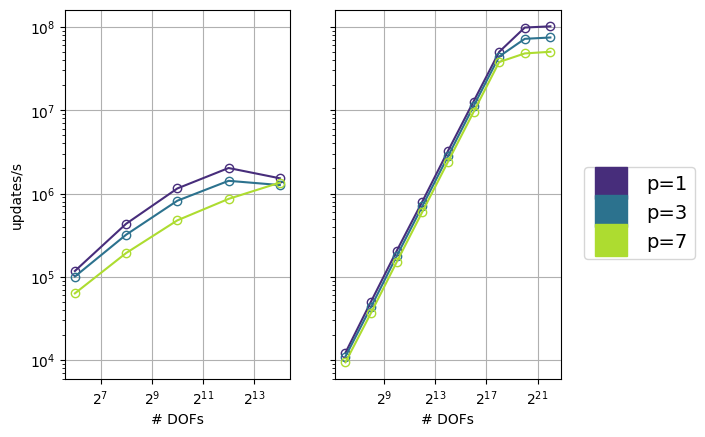

In [3]:
# plot
fig, axs = plt.subplots(1, 2, sharey=True)

for cupy_value, cupy_group in df.groupby("cupy"):
    for p_value, p_group in cupy_group.groupby("p"):
        axs[int(cupy_value)].plot(
            p_group["DOFs"],
            p_group["updates_per_s"],
            "-o",
            mfc="none",
            label=f"p={p_value}",
            color=get_color(p_value),
        )

leg = axs[1].legend(loc="center", bbox_to_anchor=(1.35, 0.45), fontsize=14)
for line, p in zip(leg.get_lines(), [1, 3, 7]):
    line.set_linestyle("none")
    line.set_marker("s")
    line.set_markersize(23)
    line.set_markerfacecolor(get_color(p))

axs[0].set_xlabel("# DOFs")
axs[1].set_xlabel("# DOFs")
axs[0].set_ylabel("updates/s")
axs[0].set_xscale("log", base=2)
axs[1].set_xscale("log", base=2)
axs[0].set_yscale("log")
axs[0].grid()
axs[1].grid()

fig.savefig(f"../../out/square_timing_{ndims}D.png", dpi=300, bbox_inches="tight")